In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('date_time_series.csv.txt')

df['date'] = pd.to_datetime(df['date'])

df = df.set_index('date')
df

,sales
date,
2022-01-01,1200
2022-02-01,1350
2022-03-01,1280
2022-04-01,1500


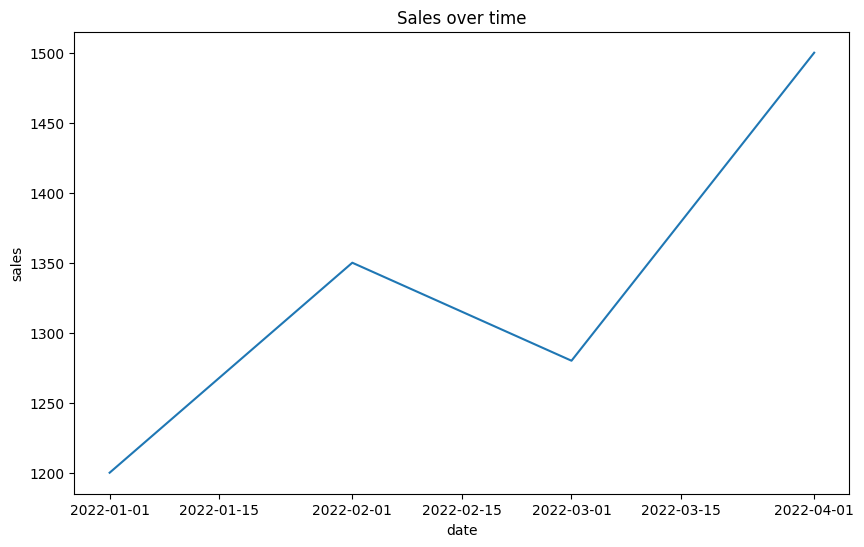

In [3]:
plt.figure(figsize=(10,6))
plt.title('Sales over time')
plt.plot(df.index,df['sales'])
plt.xlabel('date')
plt.ylabel('sales')
plt.show()

In [4]:
df['lag_1'] = df['sales'].shift(1)

In [5]:
df['ma_3'] = df['sales'].rolling(window=3).mean()
df['ma_3']

date
2022-01-01            NaN
2022-02-01            NaN
2022-03-01    1276.666667
2022-04-01    1376.666667
Name: ma_3, dtype: float64

In [6]:
df = df.dropna()

In [7]:
df

,sales,lag_1,ma_3
date,,,
2022-03-01,1280,1350.0,1276.666667
2022-04-01,1500,1280.0,1376.666667


In [8]:
spilt_index = int(len(df)*0.8)

train = df.iloc[:spilt_index]
test = df.iloc[spilt_index:]

In [9]:
x_train = train[['lag_1','ma_3']]
y_train = train['sales']

x_test = test[['lag_1','ma_3']]
y_test = test['sales']


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
import numpy as np 

last_window = [1350,1280]
# last_window = df['lag_1'].tolist() #  columns ma jitni bi numeric value hai sab ko ak sath pick kara ga is ka large no la kiya hai
# print(len(last_window))
prediction = []
for i in range(5):
    x = np.array(last_window).reshape(1,-1)
    next_pred = model.predict(x)[0]
    prediction.append(next_pred)

    last_window.pop(0)
    last_window.append(next_pred)

print('rolling forecasting', prediction)



rolling forecasting [1280.0, 1280.0, 1280.0, 1280.0, 1280.0]


C:\Users\MasteR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\MasteR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\MasteR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\MasteR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python31

In [18]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model,f)